In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [3]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.5
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [4]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

# Stoichiometry analysis of data BaCl$_2$ and Ba(ClO$_4$)$_2$ on Cu policrystal
1- Sublimations of Ba(ClO$_4$)$_2$ (10th Aug 2020)

2- Sublimations of BaCl$_2$ (26th October 2020)

Each set contain Clean Cu data, BaCl* sublimation data and FBI deposition _after_ Ba (ALInjected FBI-ester in AcN in the 1st case and sublimated in the 2nd)

## Read processed scaled experiments

In [5]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/**/*.sxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
#     if ('/proc' in f):
        files_new.append(f)
filesCl2 = files_new

filesCl2

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201022_Cu_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min_FBI_subl_20min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201027_Cu_BaCl2_subl_45min_FBI_subl_40min.sxy']

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/**/*.sxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
#     if ('/proc' in f):
        files_new.append(f)
filesClO4 = files_new
filesClO4[0], filesClO4[2] = filesClO4[2], filesClO4[0]
filesClO4[1], filesClO4[2] = filesClO4[2], filesClO4[1]

filesClO4

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_clean1.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_BaClO42_sublim_15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_BaClO42_sublim_1h.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200811_Cu_BaClO42_sublim_2h15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200811_Cu_BaClO42_sublim_3h45min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200813_Cu_BaClO42_sublim_3h45min_FBI_ester_200pulses.sxy']

In [7]:
scaled_Cl2 = [read_processed_xp(f, ls='dashed') for f in filesCl2]
colors = ['k', 'b', 'purple', 'red']
for xp, c in zip(scaled_Cl2, colors):
    xp.color = c

In [8]:
scaled_ClO4 = [read_processed_xp(f) for f in filesClO4]
colors = ['k', 'b', 'g', 'y', 'c', 'purple', 'r']
for xp, c in zip(scaled_ClO4, colors):
    xp.color = c

In [9]:
scaled_ClO4[5].name = 'Cu_BaClO42_sublim_3h45min\n+FBI_ester_200pulses'

## Show individual plots

In [7]:
regions = scaled_Cl2[0].dfx.columns.levels[0].values
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

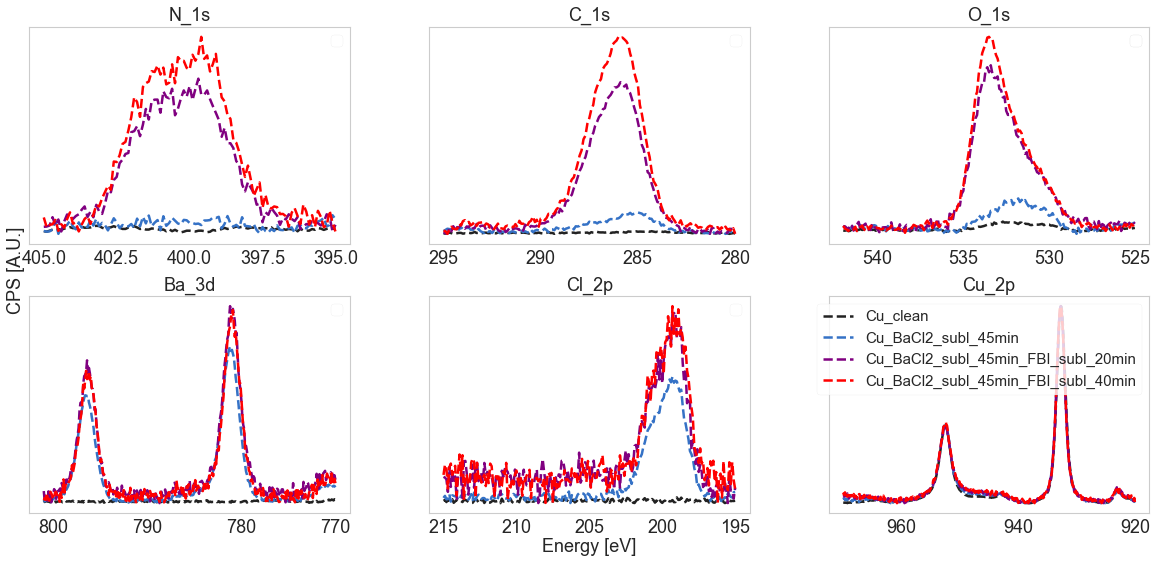

In [37]:
plot_xp_regions(scaled_Cl2, regions, ncols=3);

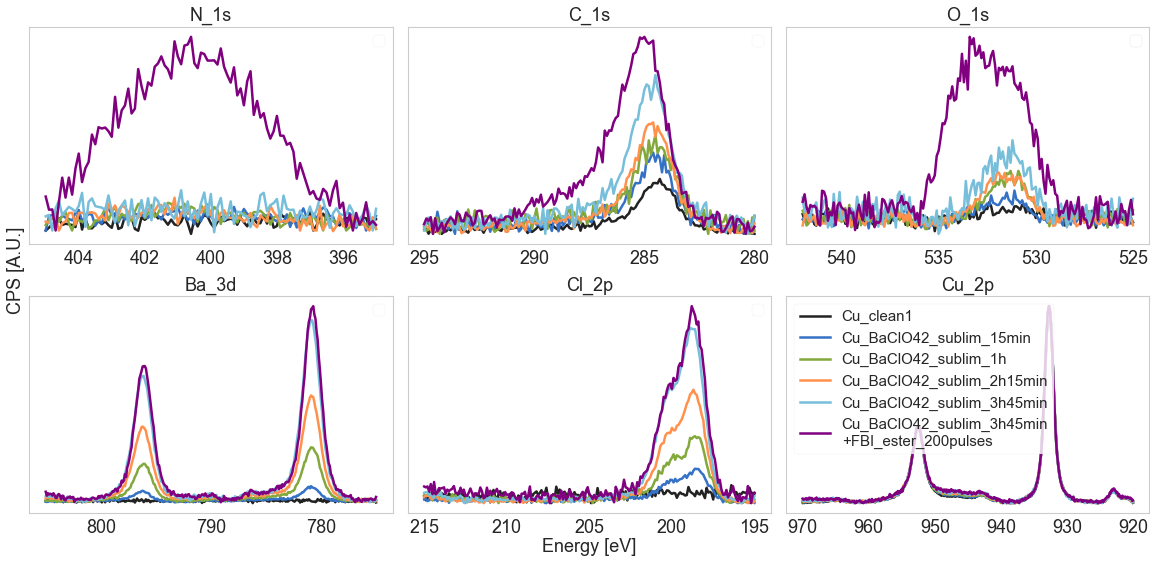

In [49]:
plot_xp_regions(scaled_ClO4, regions, ncols=3);

### Normalized spectra

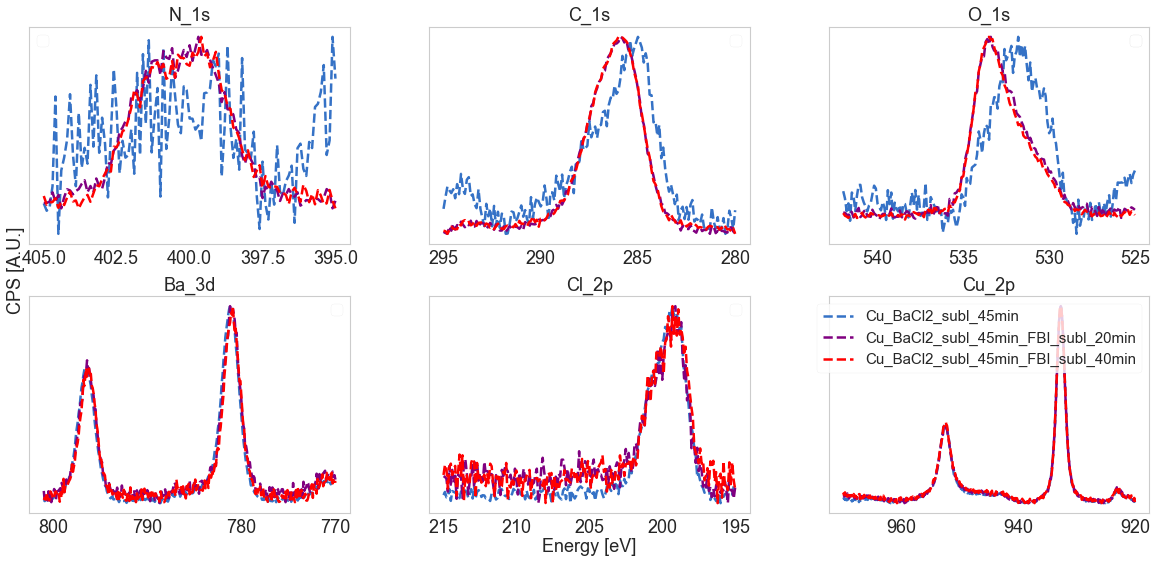

In [39]:
plot_normal_regions(scaled_Cl2[1:], regions);

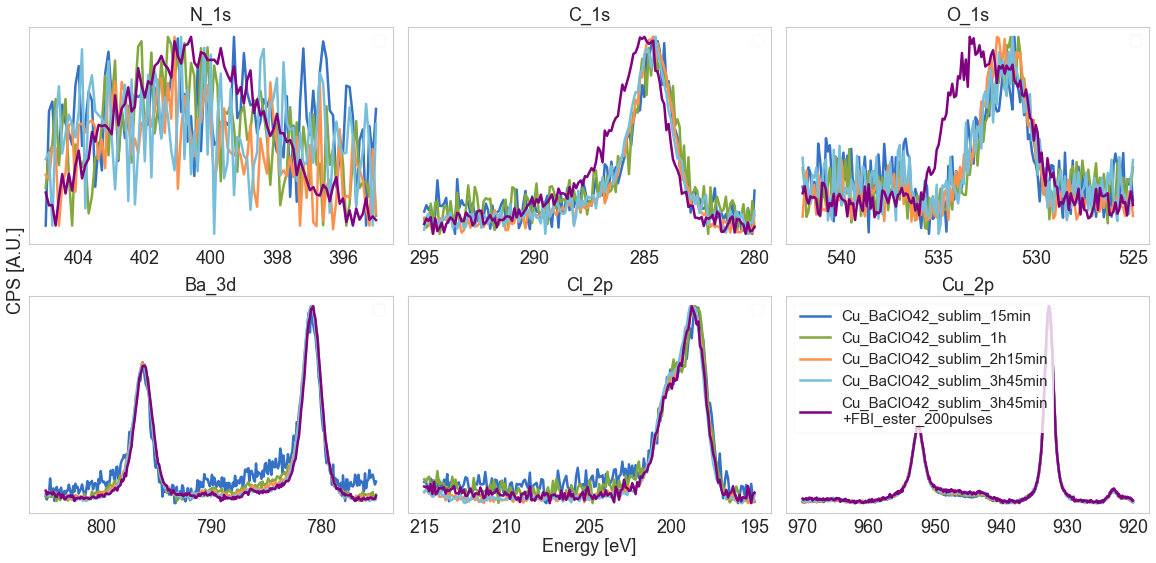

In [51]:
plot_normal_regions(scaled_ClO4[1:], regions);

## Integrate areas 

### C 1s

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:67: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


[346.41561351947104,
 1981.0312731920046,
 12126.653503302301,
 15961.505559006337]

<Figure size 460.8x403.2 with 0 Axes>

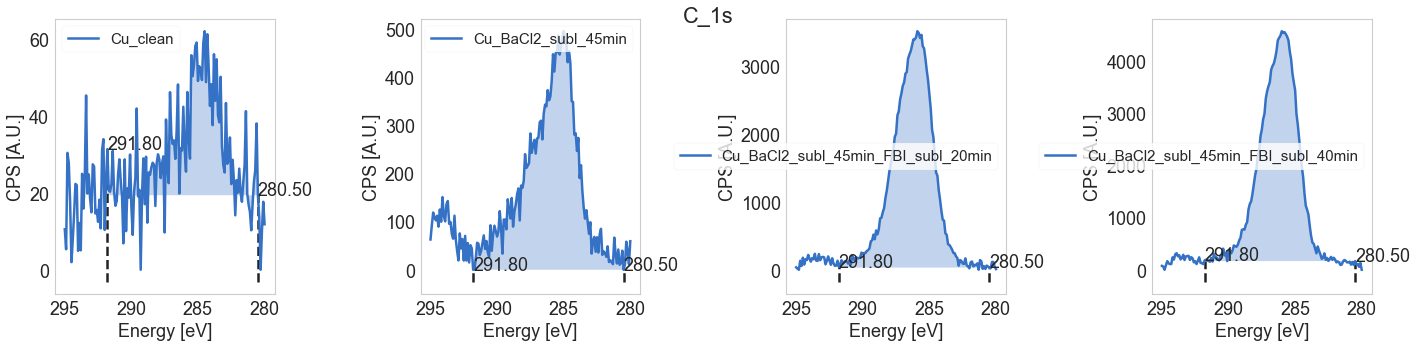

In [10]:
region = 'C_1s'
integrateRegions(scaled_Cl2, region, indRef=1, asf=asf)

[3315.524475686328,
 5465.252744411937,
 6994.652648820182,
 6636.240134418354,
 9987.094884378328,
 14578.998726529046]

<Figure size 460.8x403.2 with 0 Axes>

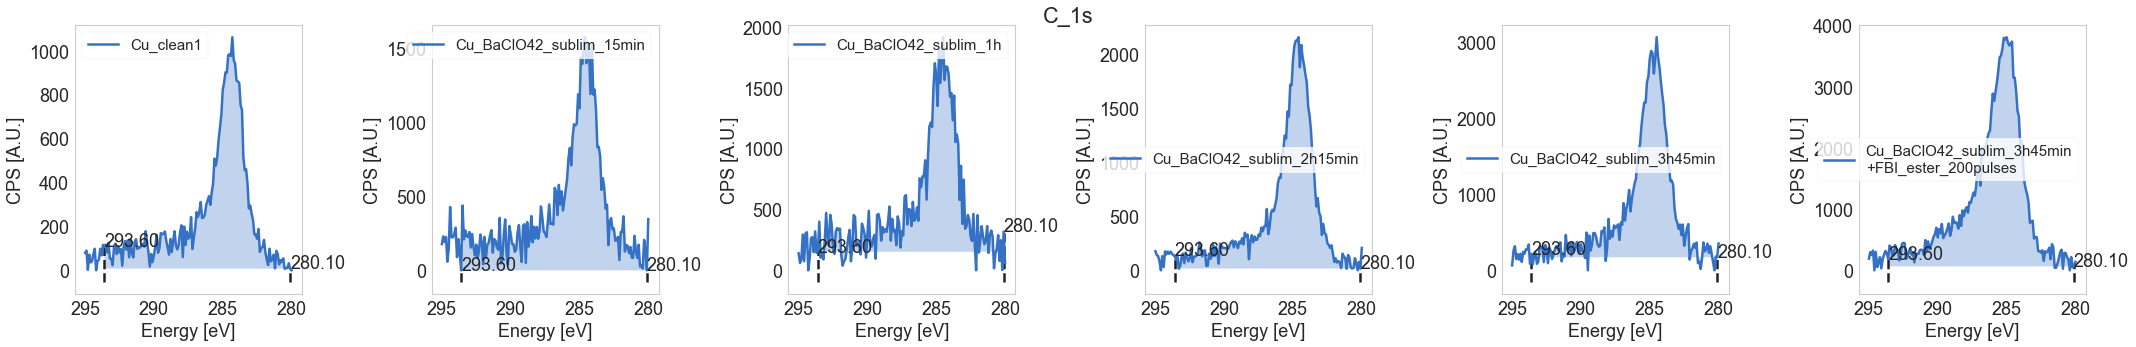

In [11]:
region = 'C_1s'
integrateRegions(scaled_ClO4, region, indRef=1, asf=asf)

#### Correct for bg substrate abundance

In [12]:
for xp in scaled_Cl2[1:]:
    uncorr_area = xp.area['C_1s']
    xp.area.update({'C_1s': uncorr_area - scaled_Cl2[0].area['C_1s']})

In [13]:
for xp in scaled_ClO4[1:]:
    uncorr_area = xp.area['C_1s']
    xp.area.update({'C_1s': uncorr_area - scaled_ClO4[0].area['C_1s']})

### O 1s

[543.9447358262003, 1775.5737374087792, 8708.878118945187, 9769.99411400612]

<Figure size 460.8x403.2 with 0 Axes>

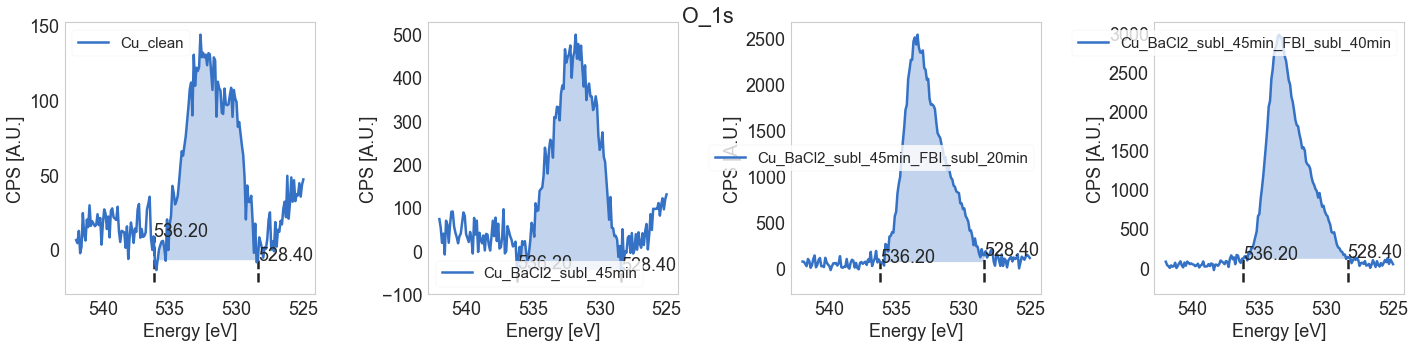

In [14]:
region = 'O_1s'
integrateRegions(scaled_Cl2, region, indRef=1, asf=asf)

[1049.5079821704276,
 1204.0744560330268,
 1778.832583513485,
 1798.8475728217468,
 3043.656613463852,
 8796.949338867267]

<Figure size 460.8x403.2 with 0 Axes>

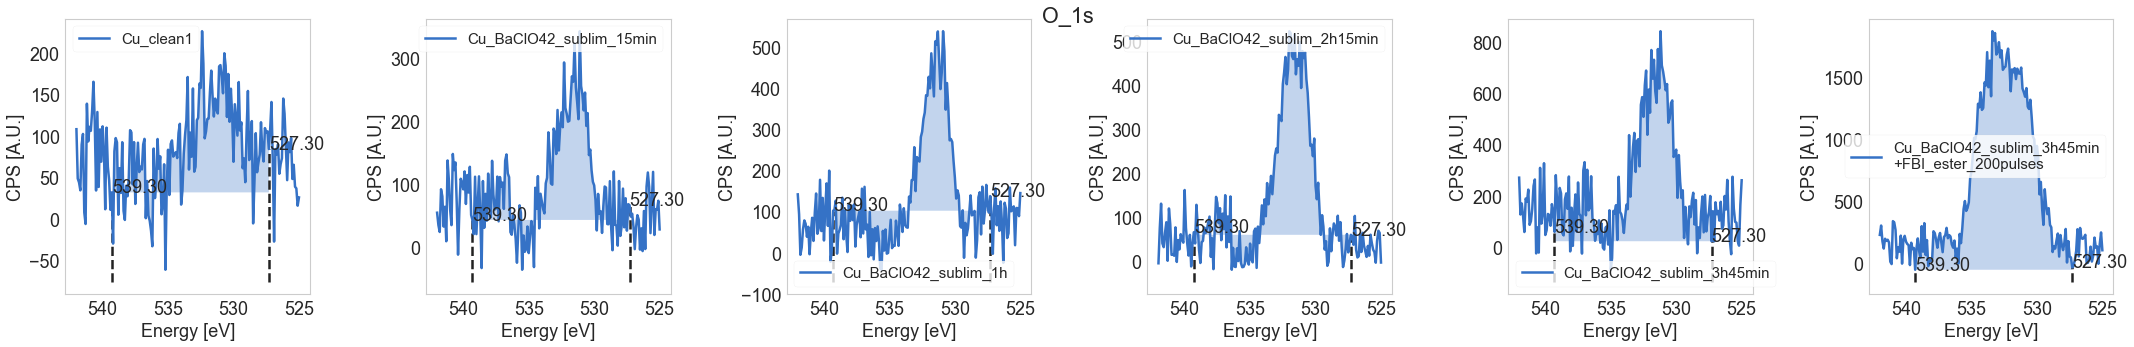

In [15]:
region = 'O_1s'
integrateRegions(scaled_ClO4, region, indRef=5, asf=asf)

#### Correct for bg substrate abundance

In [16]:
for xp in scaled_Cl2[1:]:
    uncorr_area = xp.area['O_1s']
    xp.area.update({'O_1s': uncorr_area - scaled_Cl2[0].area['O_1s']})

In [17]:
for xp in scaled_ClO4[1:]:
    uncorr_area = xp.area['O_1s']
    xp.area.update({'O_1s': uncorr_area - scaled_ClO4[0].area['O_1s']})

### N 1s

[92.97159940157736, 255.91970711040688, 2276.7450001449397, 2839.431709132586]

<Figure size 460.8x403.2 with 0 Axes>

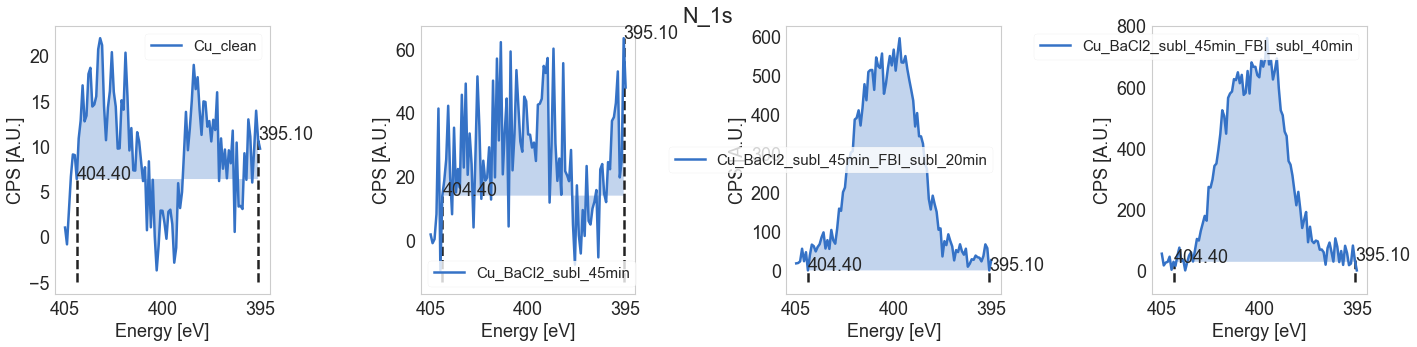

In [18]:
region = 'N_1s'
integrateRegions(scaled_Cl2, region, indRef=2, asf=asf)

[174.1739036365916,
 267.3900084801492,
 275.16661564506217,
 268.16216642746605,
 397.7882589034144,
 2054.7653180215098]

<Figure size 460.8x403.2 with 0 Axes>

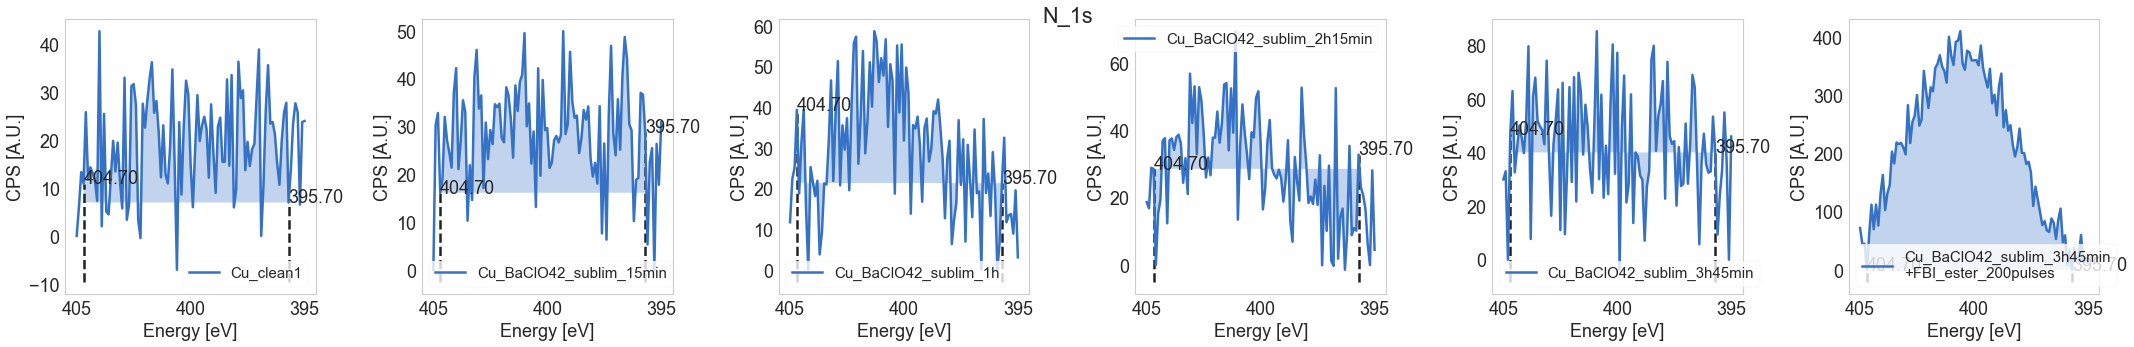

In [19]:
region = 'N_1s'
integrateRegions(scaled_ClO4, region, indRef=5, asf=asf)

### Ba 3d

In [20]:
def integrateRegions(exps: list, region : str, indRef: int, asf: dict, 
                     eup: float = None, edw: float = None,
                     lb : str = None, flag_fill : bool = True):
    """Integrate peaks for a list of experiments between two minima 
       The minima are automatically located for exps[indRef] unless they are specified by eup and edw
    The boundary are fixed for the whole list."""
    
    xRef = exps[indRef].dfx[region].dropna().energy     # Use the energy array of reference xp to crop the other xp's
    
    if eup == None or edw == None:
        ind = flexible_integration_limits(exps[indRef], region=region, doublePeak=0, flag_plot=False)
        lmidx, rmidx = ind[-2:] # The index of the minima are always the last two
        eup, edw = xRef[lmidx], xRef[rmidx]
        plt.clf()
    
    fig, ax = plt.subplots(1, len(exps), figsize=(len(exps)*5, 5) )
    area = []
    for i, xp in enumerate(exps):
        try:
            y = xp.dfx[region].dropna().counts
        except KeyError as e:          #Check the region exists in this xp
            print(e, 'region does not exist in ' + xp.name)
            xp.area.update({region: 0})
            continue

        x = xp.dfx[region].dropna().energy
        ax[i].plot(x, y, label=xp.name)

        xpCrop = crop_spectrum(xp, region, eup = eup, edw = edw)
        yc = xpCrop.dfx[region].dropna().counts.values
        xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range

        step = x[0] - x[1]
        area.append(np.trapz(yc, dx=step))

        try:
            xp.area.update({region : area[-1]/asf[region]})
        except (KeyError, NameError) as e:
            print(e, ', asf missing, returning raw area')
            pass

        if flag_fill:
            if yc[0] > yc[-1]:
                ax[i].fill_between(xc , y1 = yc[-1], y2 = yc, alpha=0.3)
            else:
                ax[i].fill_between(xc, y1 = yc[0], y2 = yc, alpha=0.3)
            ybase = ax[i].get_ylim()[0]

            for j in [0, -1]:
                ax[i].vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
                ax[i].text(s='%.2f'%xc[j], x = xc[j], y = yc[j])
        cosmetics_plot(ax=ax[i])
    plt.tight_layout()
    fig.suptitle(region)
    return area

[1047.9054828426874, 37639.84235933832, 52181.0170398121, 47839.62098369284]

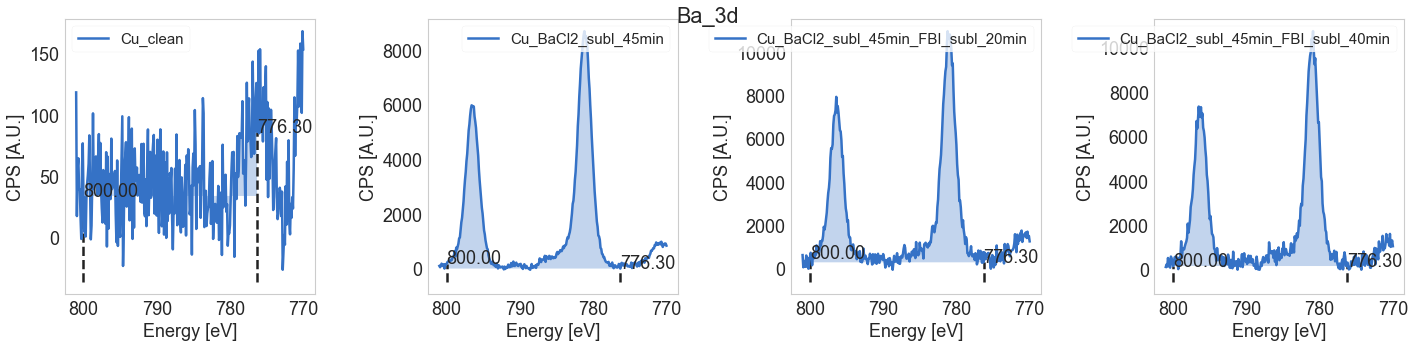

In [21]:
region = 'Ba_3d'
integrateRegions(scaled_Cl2, region, indRef=1, eup=800, edw=776.3, asf=asf)

[7677.140488752464,
 16911.666219526036,
 51167.00131346671,
 97415.12365802022,
 159627.64597772583,
 167437.24073258054]

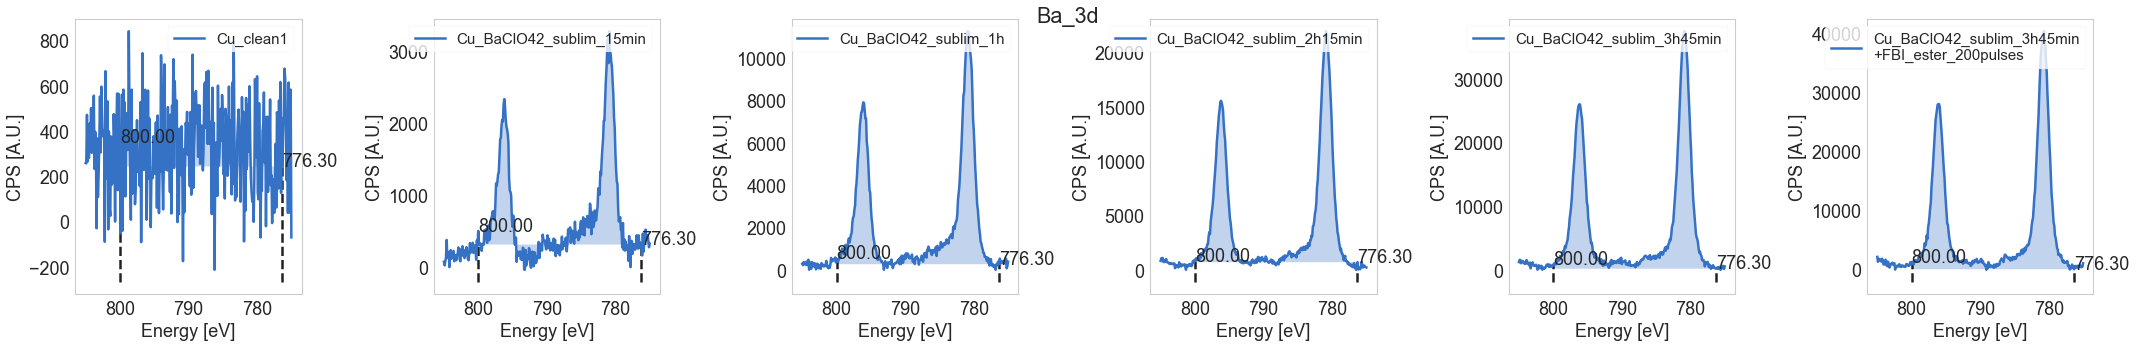

In [22]:
region = 'Ba_3d'
integrateRegions(scaled_ClO4, region, indRef=5, eup=800, edw=776.3, asf=asf)

### Cl 2p

[196.8345591467202, 3132.027094713035, 5263.701800891225, 5689.830491121437]

<Figure size 460.8x403.2 with 0 Axes>

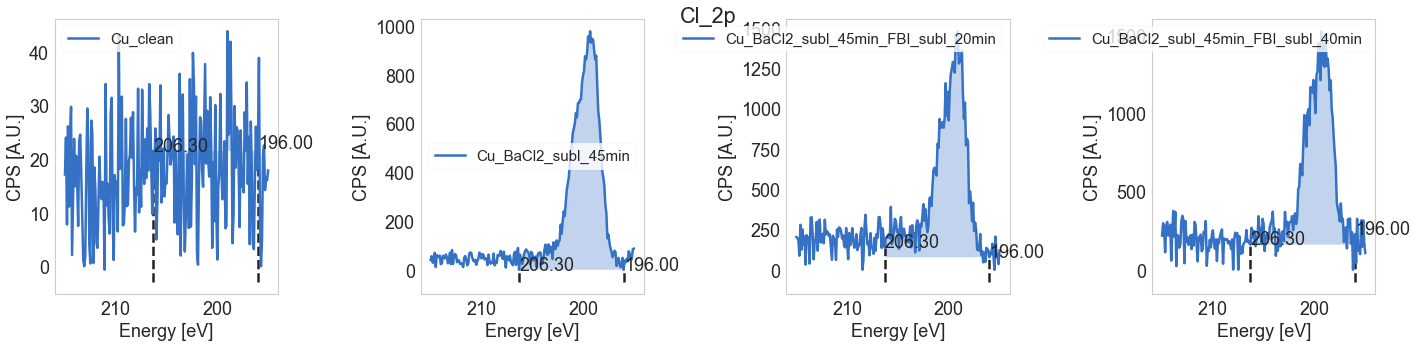

In [23]:
region = 'Cl_2p'
integrateRegions(scaled_Cl2, region, indRef=1, asf=asf)

[2553.0116118916194,
 2695.085841281713,
 4811.075400834403,
 7436.1534009732095,
 11374.869269948453,
 12864.439300602602]

<Figure size 460.8x403.2 with 0 Axes>

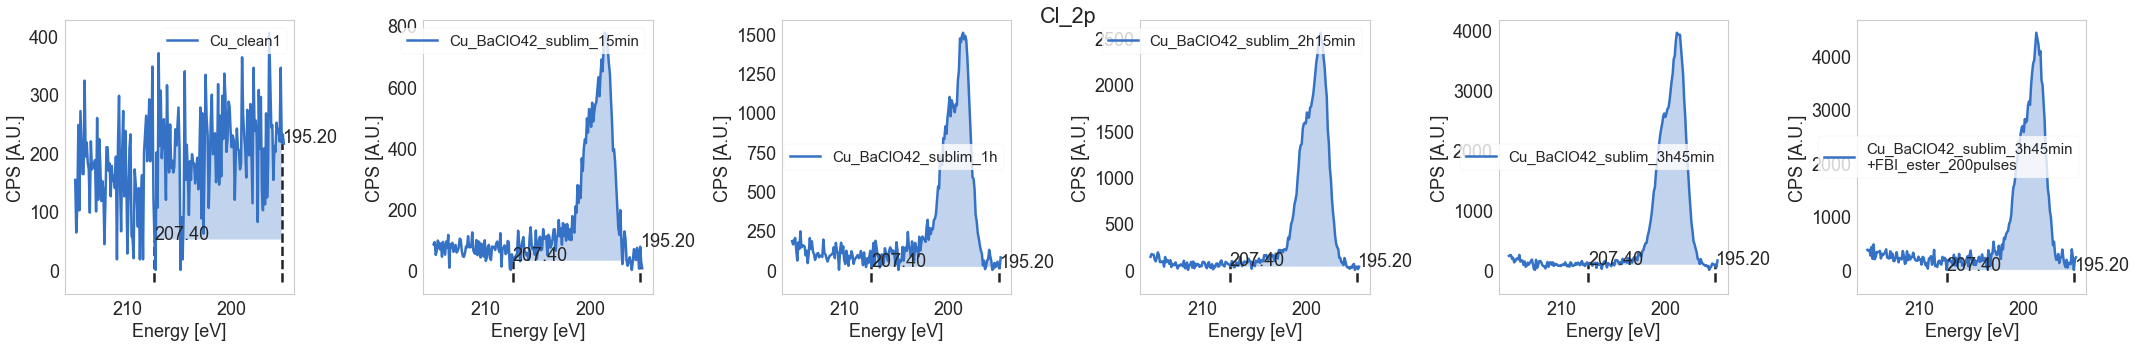

In [24]:
region = 'Cl_2p'
integrateRegions(scaled_ClO4, region, indRef=5, asf=asf)

### Cu 2p

In [25]:
region = 'Cu_2p'
integrateRegions(proc_exps, region, indRef=2, asf=asf)

NameError: name 'proc_exps' is not defined

In [ ]:
region = 'Cu_2p'
integrateRegions(scaled_Cl2, region, indRef=1, asf=asf)

In [ ]:
region = 'Cu_2p'
integrateRegions(scaled_ClO4, region, indRef=5, asf=asf)

## Stoichiometry 

In [26]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'Ba_3d'))
make_stoichometry_table(scaled_Cl2,  num=num, denom=denom)
print('Nominal \t', 3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5), '\t %.3f' %(1/3), '\t 2.00')

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cl_/Ba_	
Cu_clean	0.25 	 6.00 	 1.53 	 0.72 	 1.58 	 
Cu_BaCl2_subl_45min	0.31 	 10.29 	 3.19 	 9.37 	 0.70 	 
Cu_BaCl2_subl_45min_FBI_subl_20min	0.42 	 8.34 	 3.47 	 1.46 	 0.85 	 
Cu_BaCl2_subl_45min_FBI_subl_40min	0.46 	 8.86 	 4.07 	 1.07 	 1.00 	 
Nominal 	 0.6 	 10.333 	 6.200 	 0.333 	 2.00


In [27]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'Ba_3d'))
make_stoichometry_table(scaled_ClO4,  num=num, denom=denom)
print('Nominal \t', 3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5), '\t %.3f' %(1/3), '\t 4.00' )

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cl_/Ba_	
Cu_clean1	0.25 	 30.68 	 7.59 	 2.81 	 2.80 	 
Cu_BaClO42_sublim_15min	2.58 	 12.96 	 33.41 	 4.03 	 1.34 	 
Cu_BaClO42_sublim_1h	0.56 	 21.55 	 12.12 	 11.84 	 0.79 	 
Cu_BaClO42_sublim_2h15min	0.53 	 19.96 	 10.64 	 23.13 	 0.64 	 
Cu_BaClO42_sublim_3h45min	0.30 	 27.03 	 8.04 	 25.56 	 0.60 	 
Cu_BaClO42_sublim_3h45min
+FBI_ester_200pulses	0.40 	 8.83 	 3.49 	 5.19 	 0.65 	 
Nominal 	 0.6 	 10.333 	 6.200 	 0.333 	 4.00


In [55]:
print('Nominal')
print('N/O \t C/N \t \t C/O \t Ba/N (1eq.)')
print(3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5), '\t %.3f' %(1/3) )

Nominal
N/O 	 C/N 	 	 C/O 	 Ba/N (1eq.)
0.6 	 10.333 	 6.200 	 0.333


## Store results 

In [93]:
for xp in scaled_Cl2:
    write_processed_xp(xp.path, xp)

In [94]:
for xp in scaled_ClO4:
    write_processed_xp(xp.path, xp)